# Case 1. Heart Disease Classification
# Ville Seeste 4.2.2018 
# Helsinki Metropolia University of Applied Sciences

Objectives in this exercise is to learn how to preprocess data and with that data try to diagnos heart disease.

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
import pandas as pd
from sklearn.utils import shuffle


colnames = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'diagnosis']

# Processed data

pCleveland = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', na_values='?', names=colnames)
pHungarian = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data', na_values='?', names=colnames)
pSwitzerland = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data', na_values='?', names=colnames)
pLongBeachVA = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data', na_values='?', names=colnames)

# Raw data
#
# Reprocessed hungarian data seems to be same as processed
# Raw Cleveland data seems to be broken
#rHungarian = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/hungarian.data', na_values='-9', sep=' ')

In [125]:
datas = [pCleveland, pHungarian, pSwitzerland, pLongBeachVA]
data = pd.concat(datas)

In [126]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [127]:
data = shuffle(data)
diagnoses = data['diagnosis']
data = data.drop(['diagnosis'], axis=1)
data = data.fillna(data.mean())

In [128]:
diagnoses.head(10)

194    2
126    1
107    0
45     4
205    1
279    1
229    2
273    0
137    3
68     0
Name: diagnosis, dtype: int64

In [129]:
y_train = diagnoses[:644]
y_test = diagnoses[644:]
# to categorical
#y_train = keras.utils.to_categorical(y_train)
#y_test = keras.utils.to_categorical(y_test)

x_train = data[:644]
x_test = data[644:]

In [130]:
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

x_train -= mean
x_train /= (2 * std)

x_test -= mean
x_test /= (2 * std)

In [131]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(13,), activation='relu'))
#model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()
print(x_test.dtypes)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
dtype: object


In [132]:
hist = model.fit(x_train, y_train, epochs=1000, batch_size=50, validation_data=(x_test,y_test), shuffle=True)

Train on 644 samples, validate on 276 samples
Epoch 1/1000
644/644 [==============================] - 1s 2ms/step - loss: 0.3913 - acc: 0.4767 - val_loss: 0.4086 - val_acc: 0.5290
Epoch 2/1000
644/644 [==============================] - 0s 123us/step - loss: 0.3110 - acc: 0.4689 - val_loss: 0.3553 - val_acc: 0.5435
Epoch 3/1000
644/644 [==============================] - 0s 113us/step - loss: 0.2449 - acc: 0.4705 - val_loss: 0.3038 - val_acc: 0.5471
Epoch 4/1000
644/644 [==============================] - 0s 104us/step - loss: 0.1795 - acc: 0.4736 - val_loss: 0.2550 - val_acc: 0.5435
Epoch 5/1000
644/644 [==============================] - 0s 104us/step - loss: 0.1174 - acc: 0.4720 - val_loss: 0.2070 - val_acc: 0.5616
Epoch 6/1000
644/644 [==============================] - 0s 109us/step - loss: 0.0529 - acc: 0.4752 - val_loss: 0.1554 - val_acc: 0.5543
Epoch 7/1000
644/644 [==============================] - 0s 108us/step - loss: -0.0112 - acc: 0.4736 - val_loss: 0.1069 - val_acc: 0.5580
Epo

644/644 [==============================] - 0s 100us/step - loss: -4.8297 - acc: 0.5062 - val_loss: -3.4203 - val_acc: 0.5833
Epoch 60/1000
644/644 [==============================] - 0s 110us/step - loss: -4.8927 - acc: 0.5062 - val_loss: -3.4529 - val_acc: 0.5833
Epoch 61/1000
644/644 [==============================] - 0s 117us/step - loss: -4.9487 - acc: 0.5062 - val_loss: -3.4815 - val_acc: 0.5833
Epoch 62/1000
644/644 [==============================] - 0s 100us/step - loss: -5.0075 - acc: 0.5062 - val_loss: -3.5063 - val_acc: 0.5833
Epoch 63/1000
644/644 [==============================] - 0s 109us/step - loss: -5.0623 - acc: 0.5062 - val_loss: -3.5293 - val_acc: 0.5833
Epoch 64/1000
644/644 [==============================] - 0s 102us/step - loss: -5.1190 - acc: 0.5062 - val_loss: -3.5536 - val_acc: 0.5833
Epoch 65/1000
644/644 [==============================] - 0s 104us/step - loss: -5.1647 - acc: 0.5062 - val_loss: -3.5753 - val_acc: 0.5833
Epoch 66/1000
644/644 [==================

644/644 [==============================] - 0s 102us/step - loss: -5.6730 - acc: 0.5202 - val_loss: -3.7604 - val_acc: 0.5942
Epoch 119/1000
644/644 [==============================] - 0s 96us/step - loss: -5.6757 - acc: 0.5202 - val_loss: -3.7588 - val_acc: 0.5942
Epoch 120/1000
644/644 [==============================] - 0s 105us/step - loss: -5.6789 - acc: 0.5202 - val_loss: -3.7579 - val_acc: 0.5942
Epoch 121/1000
644/644 [==============================] - 0s 105us/step - loss: -5.6843 - acc: 0.5202 - val_loss: -3.7585 - val_acc: 0.5942
Epoch 122/1000
644/644 [==============================] - 0s 106us/step - loss: -5.6860 - acc: 0.5202 - val_loss: -3.7590 - val_acc: 0.5942
Epoch 123/1000
644/644 [==============================] - 0s 103us/step - loss: -5.6908 - acc: 0.5202 - val_loss: -3.7598 - val_acc: 0.5978
Epoch 124/1000
644/644 [==============================] - 0s 100us/step - loss: -5.6958 - acc: 0.5202 - val_loss: -3.7564 - val_acc: 0.5978
Epoch 125/1000
644/644 [============

Epoch 177/1000
644/644 [==============================] - 0s 104us/step - loss: -5.8043 - acc: 0.5311 - val_loss: -3.7290 - val_acc: 0.5870
Epoch 178/1000
644/644 [==============================] - 0s 106us/step - loss: -5.8048 - acc: 0.5311 - val_loss: -3.7281 - val_acc: 0.5870
Epoch 179/1000
644/644 [==============================] - 0s 102us/step - loss: -5.8063 - acc: 0.5311 - val_loss: -3.7282 - val_acc: 0.5870
Epoch 180/1000
644/644 [==============================] - 0s 95us/step - loss: -5.8089 - acc: 0.5326 - val_loss: -3.7284 - val_acc: 0.5870
Epoch 181/1000
644/644 [==============================] - 0s 108us/step - loss: -5.8102 - acc: 0.5326 - val_loss: -3.7276 - val_acc: 0.5833
Epoch 182/1000
644/644 [==============================] - 0s 117us/step - loss: -5.8109 - acc: 0.5342 - val_loss: -3.7272 - val_acc: 0.5833
Epoch 183/1000
644/644 [==============================] - 0s 127us/step - loss: -5.8144 - acc: 0.5342 - val_loss: -3.7241 - val_acc: 0.5833
Epoch 184/1000
644/64

644/644 [==============================] - 0s 102us/step - loss: -5.8755 - acc: 0.5388 - val_loss: -3.6857 - val_acc: 0.5833
Epoch 236/1000
644/644 [==============================] - 0s 106us/step - loss: -5.8758 - acc: 0.5388 - val_loss: -3.6852 - val_acc: 0.5833
Epoch 237/1000
644/644 [==============================] - 0s 102us/step - loss: -5.8775 - acc: 0.5404 - val_loss: -3.6842 - val_acc: 0.5833
Epoch 238/1000
644/644 [==============================] - 0s 105us/step - loss: -5.8791 - acc: 0.5404 - val_loss: -3.6860 - val_acc: 0.5833
Epoch 239/1000
644/644 [==============================] - 0s 112us/step - loss: -5.8781 - acc: 0.5404 - val_loss: -3.6856 - val_acc: 0.5833
Epoch 240/1000
644/644 [==============================] - 0s 107us/step - loss: -5.8798 - acc: 0.5419 - val_loss: -3.6851 - val_acc: 0.5833
Epoch 241/1000
644/644 [==============================] - 0s 98us/step - loss: -5.8808 - acc: 0.5419 - val_loss: -3.6850 - val_acc: 0.5833
Epoch 242/1000
644/644 [============

644/644 [==============================] - 0s 103us/step - loss: -5.9243 - acc: 0.5481 - val_loss: -3.6534 - val_acc: 0.5797
Epoch 294/1000
644/644 [==============================] - 0s 106us/step - loss: -5.9245 - acc: 0.5481 - val_loss: -3.6527 - val_acc: 0.5797
Epoch 295/1000
644/644 [==============================] - 0s 99us/step - loss: -5.9253 - acc: 0.5466 - val_loss: -3.6524 - val_acc: 0.5797
Epoch 296/1000
644/644 [==============================] - 0s 106us/step - loss: -5.9266 - acc: 0.5466 - val_loss: -3.6528 - val_acc: 0.5797
Epoch 297/1000
644/644 [==============================] - 0s 106us/step - loss: -5.9276 - acc: 0.5481 - val_loss: -3.6517 - val_acc: 0.5797
Epoch 298/1000
644/644 [==============================] - 0s 109us/step - loss: -5.9277 - acc: 0.5497 - val_loss: -3.6517 - val_acc: 0.5797
Epoch 299/1000
644/644 [==============================] - 0s 103us/step - loss: -5.9286 - acc: 0.5481 - val_loss: -3.6524 - val_acc: 0.5761
Epoch 300/1000
644/644 [============

644/644 [==============================] - 0s 102us/step - loss: -5.9643 - acc: 0.5450 - val_loss: -3.6311 - val_acc: 0.5797
Epoch 352/1000
644/644 [==============================] - ETA: 0s - loss: -8.7104 - acc: 0.48 - 0s 101us/step - loss: -5.9663 - acc: 0.5450 - val_loss: -3.6308 - val_acc: 0.5797
Epoch 353/1000
644/644 [==============================] - 0s 105us/step - loss: -5.9661 - acc: 0.5450 - val_loss: -3.6302 - val_acc: 0.5797
Epoch 354/1000
644/644 [==============================] - 0s 111us/step - loss: -5.9642 - acc: 0.5450 - val_loss: -3.6301 - val_acc: 0.5797
Epoch 355/1000
644/644 [==============================] - 0s 110us/step - loss: -5.9672 - acc: 0.5450 - val_loss: -3.6297 - val_acc: 0.5797
Epoch 356/1000
644/644 [==============================] - 0s 105us/step - loss: -5.9687 - acc: 0.5466 - val_loss: -3.6306 - val_acc: 0.5797
Epoch 357/1000
644/644 [==============================] - 0s 109us/step - loss: -5.9659 - acc: 0.5466 - val_loss: -3.6303 - val_acc: 0.57

644/644 [==============================] - 0s 103us/step - loss: -6.0026 - acc: 0.5481 - val_loss: -3.6174 - val_acc: 0.5761
Epoch 410/1000
644/644 [==============================] - 0s 99us/step - loss: -6.0065 - acc: 0.5481 - val_loss: -3.6170 - val_acc: 0.5761
Epoch 411/1000
644/644 [==============================] - 0s 103us/step - loss: -6.0040 - acc: 0.5497 - val_loss: -3.6163 - val_acc: 0.5761
Epoch 412/1000
644/644 [==============================] - 0s 112us/step - loss: -6.0072 - acc: 0.5512 - val_loss: -3.6147 - val_acc: 0.5725
Epoch 413/1000
644/644 [==============================] - 0s 105us/step - loss: -6.0094 - acc: 0.5497 - val_loss: -3.6146 - val_acc: 0.5725
Epoch 414/1000
644/644 [==============================] - 0s 99us/step - loss: -6.0074 - acc: 0.5497 - val_loss: -3.6149 - val_acc: 0.5761
Epoch 415/1000
644/644 [==============================] - 0s 103us/step - loss: -6.0078 - acc: 0.5481 - val_loss: -3.6140 - val_acc: 0.5761
Epoch 416/1000
644/644 [=============

644/644 [==============================] - 0s 97us/step - loss: -6.0475 - acc: 0.5512 - val_loss: -3.6066 - val_acc: 0.5797
Epoch 468/1000
644/644 [==============================] - 0s 106us/step - loss: -6.0477 - acc: 0.5512 - val_loss: -3.6067 - val_acc: 0.5761
Epoch 469/1000
644/644 [==============================] - 0s 105us/step - loss: -6.0475 - acc: 0.5528 - val_loss: -3.6061 - val_acc: 0.5761
Epoch 470/1000
644/644 [==============================] - 0s 99us/step - loss: -6.0478 - acc: 0.5528 - val_loss: -3.6068 - val_acc: 0.5761
Epoch 471/1000
644/644 [==============================] - 0s 115us/step - loss: -6.0486 - acc: 0.5512 - val_loss: -3.6055 - val_acc: 0.5797
Epoch 472/1000
644/644 [==============================] - 0s 101us/step - loss: -6.0493 - acc: 0.5512 - val_loss: -3.6059 - val_acc: 0.5761
Epoch 473/1000
644/644 [==============================] - ETA: 0s - loss: -9.1603 - acc: 0.52 - 0s 99us/step - loss: -6.0499 - acc: 0.5512 - val_loss: -3.6062 - val_acc: 0.5797


644/644 [==============================] - 0s 102us/step - loss: -6.0801 - acc: 0.5528 - val_loss: -3.6058 - val_acc: 0.5797
Epoch 526/1000
644/644 [==============================] - 0s 102us/step - loss: -6.0795 - acc: 0.5543 - val_loss: -3.6060 - val_acc: 0.5797
Epoch 527/1000
644/644 [==============================] - 0s 116us/step - loss: -6.0807 - acc: 0.5528 - val_loss: -3.6067 - val_acc: 0.5797
Epoch 528/1000
644/644 [==============================] - 0s 111us/step - loss: -6.0811 - acc: 0.5528 - val_loss: -3.6064 - val_acc: 0.5797
Epoch 529/1000
644/644 [==============================] - 0s 102us/step - loss: -6.0827 - acc: 0.5543 - val_loss: -3.6059 - val_acc: 0.5797
Epoch 530/1000
644/644 [==============================] - 0s 101us/step - loss: -6.0828 - acc: 0.5543 - val_loss: -3.6070 - val_acc: 0.5797
Epoch 531/1000
644/644 [==============================] - 0s 103us/step - loss: -6.0817 - acc: 0.5543 - val_loss: -3.6067 - val_acc: 0.5761
Epoch 532/1000
644/644 [===========

Epoch 584/1000
644/644 [==============================] - 0s 104us/step - loss: -6.1108 - acc: 0.5575 - val_loss: -3.6076 - val_acc: 0.5797
Epoch 585/1000
644/644 [==============================] - 0s 96us/step - loss: -6.1128 - acc: 0.5606 - val_loss: -3.6069 - val_acc: 0.5797
Epoch 586/1000
644/644 [==============================] - 0s 109us/step - loss: -6.1125 - acc: 0.5575 - val_loss: -3.6070 - val_acc: 0.5797
Epoch 587/1000
644/644 [==============================] - 0s 98us/step - loss: -6.1123 - acc: 0.5575 - val_loss: -3.6070 - val_acc: 0.5797
Epoch 588/1000
644/644 [==============================] - 0s 96us/step - loss: -6.1143 - acc: 0.5575 - val_loss: -3.6081 - val_acc: 0.5797
Epoch 589/1000
644/644 [==============================] - 0s 113us/step - loss: -6.1136 - acc: 0.5575 - val_loss: -3.6078 - val_acc: 0.5797
Epoch 590/1000
644/644 [==============================] - 0s 106us/step - loss: -6.1136 - acc: 0.5621 - val_loss: -3.6076 - val_acc: 0.5797
Epoch 591/1000
644/644 

644/644 [==============================] - 0s 103us/step - loss: -6.1319 - acc: 0.5652 - val_loss: -3.6086 - val_acc: 0.5797
Epoch 643/1000
644/644 [==============================] - 0s 97us/step - loss: -6.1336 - acc: 0.5668 - val_loss: -3.6109 - val_acc: 0.5797
Epoch 644/1000
644/644 [==============================] - 0s 101us/step - loss: -6.1338 - acc: 0.5668 - val_loss: -3.6103 - val_acc: 0.5797
Epoch 645/1000
644/644 [==============================] - 0s 99us/step - loss: -6.1351 - acc: 0.5668 - val_loss: -3.6106 - val_acc: 0.5797
Epoch 646/1000
644/644 [==============================] - 0s 122us/step - loss: -6.1349 - acc: 0.5668 - val_loss: -3.6099 - val_acc: 0.5797
Epoch 647/1000
644/644 [==============================] - 0s 101us/step - loss: -6.1336 - acc: 0.5668 - val_loss: -3.6074 - val_acc: 0.5797
Epoch 648/1000
644/644 [==============================] - 0s 103us/step - loss: -6.1354 - acc: 0.5683 - val_loss: -3.6083 - val_acc: 0.5797
Epoch 649/1000
644/644 [=============

Epoch 701/1000
644/644 [==============================] - 0s 106us/step - loss: -6.1574 - acc: 0.5652 - val_loss: -3.6216 - val_acc: 0.5797
Epoch 702/1000
644/644 [==============================] - 0s 114us/step - loss: -6.1582 - acc: 0.5652 - val_loss: -3.6216 - val_acc: 0.5797
Epoch 703/1000
644/644 [==============================] - 0s 104us/step - loss: -6.1588 - acc: 0.5668 - val_loss: -3.6219 - val_acc: 0.5797
Epoch 704/1000
644/644 [==============================] - 0s 102us/step - loss: -6.1592 - acc: 0.5668 - val_loss: -3.6224 - val_acc: 0.5797
Epoch 705/1000
644/644 [==============================] - 0s 99us/step - loss: -6.1589 - acc: 0.5652 - val_loss: -3.6212 - val_acc: 0.5797
Epoch 706/1000
644/644 [==============================] - 0s 100us/step - loss: -6.1596 - acc: 0.5668 - val_loss: -3.6215 - val_acc: 0.5797
Epoch 707/1000
644/644 [==============================] - 0s 97us/step - loss: -6.1588 - acc: 0.5683 - val_loss: -3.6233 - val_acc: 0.5797
Epoch 708/1000
644/644

644/644 [==============================] - 0s 99us/step - loss: -6.1821 - acc: 0.5683 - val_loss: -3.6290 - val_acc: 0.5870
Epoch 760/1000
644/644 [==============================] - 0s 100us/step - loss: -6.1823 - acc: 0.5683 - val_loss: -3.6292 - val_acc: 0.5870
Epoch 761/1000
644/644 [==============================] - 0s 121us/step - loss: -6.1828 - acc: 0.5668 - val_loss: -3.6290 - val_acc: 0.5870
Epoch 762/1000
644/644 [==============================] - 0s 98us/step - loss: -6.1829 - acc: 0.5683 - val_loss: -3.6290 - val_acc: 0.5870
Epoch 763/1000
644/644 [==============================] - 0s 94us/step - loss: -6.1836 - acc: 0.5699 - val_loss: -3.6291 - val_acc: 0.5870
Epoch 764/1000
644/644 [==============================] - 0s 105us/step - loss: -6.1831 - acc: 0.5683 - val_loss: -3.6295 - val_acc: 0.5870
Epoch 765/1000
644/644 [==============================] - 0s 100us/step - loss: -6.1846 - acc: 0.5683 - val_loss: -3.6297 - val_acc: 0.5870
Epoch 766/1000
644/644 [==============

644/644 [==============================] - 0s 103us/step - loss: -6.2059 - acc: 0.5745 - val_loss: -3.6338 - val_acc: 0.5870
Epoch 818/1000
644/644 [==============================] - 0s 104us/step - loss: -6.2083 - acc: 0.5745 - val_loss: -3.6312 - val_acc: 0.5870
Epoch 819/1000
644/644 [==============================] - 0s 100us/step - loss: -6.2095 - acc: 0.5776 - val_loss: -3.6342 - val_acc: 0.5870
Epoch 820/1000
644/644 [==============================] - 0s 103us/step - loss: -6.2068 - acc: 0.5761 - val_loss: -3.6342 - val_acc: 0.5870
Epoch 821/1000
644/644 [==============================] - 0s 104us/step - loss: -6.2080 - acc: 0.5745 - val_loss: -3.6352 - val_acc: 0.5870
Epoch 822/1000
644/644 [==============================] - 0s 103us/step - loss: -6.2107 - acc: 0.5745 - val_loss: -3.6319 - val_acc: 0.5870
Epoch 823/1000
644/644 [==============================] - 0s 92us/step - loss: -6.2092 - acc: 0.5761 - val_loss: -3.6348 - val_acc: 0.5870
Epoch 824/1000
644/644 [============

644/644 [==============================] - 0s 107us/step - loss: -6.2324 - acc: 0.5745 - val_loss: -3.6379 - val_acc: 0.5833
Epoch 876/1000
644/644 [==============================] - 0s 104us/step - loss: -6.2319 - acc: 0.5761 - val_loss: -3.6383 - val_acc: 0.5833
Epoch 877/1000
644/644 [==============================] - 0s 103us/step - loss: -6.2336 - acc: 0.5761 - val_loss: -3.6388 - val_acc: 0.5833
Epoch 878/1000
644/644 [==============================] - 0s 107us/step - loss: -6.2319 - acc: 0.5745 - val_loss: -3.6386 - val_acc: 0.5833
Epoch 879/1000
644/644 [==============================] - 0s 106us/step - loss: -6.2325 - acc: 0.5776 - val_loss: -3.6394 - val_acc: 0.5833
Epoch 880/1000
644/644 [==============================] - 0s 103us/step - loss: -6.2334 - acc: 0.5761 - val_loss: -3.6395 - val_acc: 0.5833
Epoch 881/1000
644/644 [==============================] - 0s 106us/step - loss: -6.2331 - acc: 0.5776 - val_loss: -3.6407 - val_acc: 0.5833
Epoch 882/1000
644/644 [===========

644/644 [==============================] - 0s 109us/step - loss: -6.2558 - acc: 0.5807 - val_loss: -3.6524 - val_acc: 0.5797
Epoch 934/1000
644/644 [==============================] - 0s 99us/step - loss: -6.2561 - acc: 0.5823 - val_loss: -3.6529 - val_acc: 0.5797
Epoch 935/1000
644/644 [==============================] - 0s 113us/step - loss: -6.2563 - acc: 0.5807 - val_loss: -3.6535 - val_acc: 0.5797
Epoch 936/1000
644/644 [==============================] - 0s 101us/step - loss: -6.2560 - acc: 0.5776 - val_loss: -3.6533 - val_acc: 0.5761
Epoch 937/1000
644/644 [==============================] - 0s 108us/step - loss: -6.2557 - acc: 0.5823 - val_loss: -3.6544 - val_acc: 0.5761
Epoch 938/1000
644/644 [==============================] - 0s 102us/step - loss: -6.2572 - acc: 0.5823 - val_loss: -3.6543 - val_acc: 0.5761
Epoch 939/1000
644/644 [==============================] - 0s 103us/step - loss: -6.2585 - acc: 0.5823 - val_loss: -3.6547 - val_acc: 0.5761
Epoch 940/1000
644/644 [============

644/644 [==============================] - 0s 101us/step - loss: -6.2773 - acc: 0.5854 - val_loss: -3.6628 - val_acc: 0.5761
Epoch 992/1000
644/644 [==============================] - 0s 100us/step - loss: -6.2768 - acc: 0.5839 - val_loss: -3.6641 - val_acc: 0.5761
Epoch 993/1000
644/644 [==============================] - 0s 102us/step - loss: -6.2772 - acc: 0.5839 - val_loss: -3.6661 - val_acc: 0.5761
Epoch 994/1000
644/644 [==============================] - 0s 110us/step - loss: -6.2778 - acc: 0.5839 - val_loss: -3.6644 - val_acc: 0.5761
Epoch 995/1000
644/644 [==============================] - 0s 107us/step - loss: -6.2782 - acc: 0.5823 - val_loss: -3.6644 - val_acc: 0.5761
Epoch 996/1000
644/644 [==============================] - 0s 107us/step - loss: -6.2781 - acc: 0.5823 - val_loss: -3.6653 - val_acc: 0.5761
Epoch 997/1000
644/644 [==============================] - 0s 98us/step - loss: -6.2787 - acc: 0.5839 - val_loss: -3.6657 - val_acc: 0.5761
Epoch 998/1000
644/644 [============

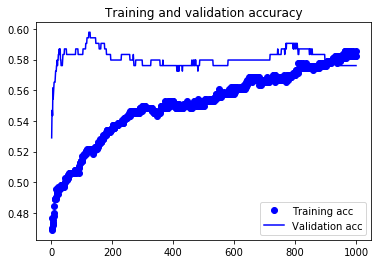

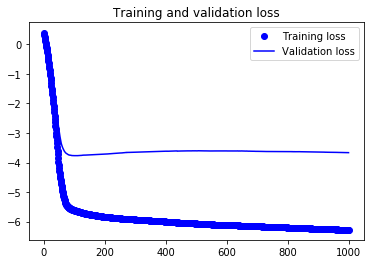

In [133]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [134]:
model.get_weights()

[array([[ 0.77261901,  0.75498736,  0.26368928,  0.66271484, -0.02421921,
          1.51375651,  0.70426148,  0.04418723,  0.02798159, -0.47818539],
        [ 1.41559124,  1.14065695,  0.5225637 ,  1.41689563,  0.67664671,
          2.36581612, -0.885759  ,  0.9488312 ,  0.55638731,  0.45756996],
        [ 0.58797783,  0.86125231, -0.81730402,  1.03017676,  0.54075861,
          1.10011673, -0.06668501,  1.21754813, -1.0464015 , -0.7842226 ],
        [-0.23636433,  0.23399679, -0.70127016,  0.09249299,  0.02731962,
          0.26038435, -0.05839209, -1.00386763, -0.08111461, -1.00063348],
        [-1.71837592, -3.36770129,  1.26959312,  0.20018317,  0.16792375,
         -1.43369067, -0.15665069, -0.38282067, -0.13628627,  0.10103836],
        [ 0.5637942 ,  0.71481681, -1.62643063,  0.16614887, -0.82361102,
          0.6959278 , -1.09779072, -0.04714641,  0.23825592, -0.36877134],
        [-0.66013086, -0.47656545, -1.01514053,  0.53283036, -0.43820804,
         -0.47345325, -0.2298454